In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
data = input_data.read_data_sets("MNIST_data/", one_hot = True)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [0]:
# Function to update the plot for each epoch and error
def dynamic_plot(x, y, y_1, ax, ticks, title, colors = ['b']):
    ax.plot(x, y, 'b', label = 'Train Loss')
    ax.plot(x, y_1, 'r', label = 'Test Loss')
    if len(x) == 1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [0]:
# Network parameters
n_hidden_1 = 512  # first hidden layer
n_hidden_2 = 128  # second hidden layer
n_input    = 784  # Mnist data input (img shape: 28x28)
n_classes  = 10   # mnist total classes (0-9 : digits)

In [0]:
# Placehoders which will be used for feeding input.
# represent it as 2D tensor of floating point numbers
# None means, it can be dimension of any length

x = tf.placeholder(tf.float32, shape = [None, n_input])
y_ = tf.placeholder(tf.float32, shape = [None, n_classes])

# keep_prob: will be used in case of dropouts for testing
keep_prob = tf.placeholder(tf.float32)

# keep_prob_input : for dropout in training
keep_prob_input = tf.placeholder(tf.float32)

In [0]:
# weights initialization
# SGD: Xavier/Glorot Normal initialization.
# stddev = sqrt[2/fan_in + fan_out]

weight_sgd = {
     # 784x512
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 0.039, mean = 0.0)), 
     # 512x128
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 0.055, mean = 0.0)),
     # 128x10
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev = 0.120, mean = 0.0))
}

biases ={
       # 512x1
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
       # 128x1
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
       # 10x1
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
# Parameters
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

## Model 1: input(784) - sigmoid(512) - sigmoid(128) - softmax(output 10)

In [0]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/
# multi_layer_perceptron_mnist.html
# Create Model
def multilayer_perceptron(x, weights, biases):
    print('x:',x.get_shape(), 'w[h1]:',weights['h1'].get_shape(), 
          'b[h1]:',biases["b1"].get_shape())
    
    # Hidden layer1 with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    print('layer_1:',layer_1.get_shape(), 'w[h2]:',weights['h2'].get_shape(), 
          'b[h2]:',biases["b2"].get_shape())
    
    # Hidden layer2 with sigmoid ativation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    print('layer_2:',layer_2.get_shape(), 'w[out]:',weights['out'].get_shape(), 
          'b[out]:',biases["out"].get_shape())
    
    # output layer with sigmoid activation
    output_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    output_layer = tf.nn.sigmoid(output_layer)
    print('output_layer:',output_layer.get_shape())
    
    return output_layer    

### Model 1 + Adam Optimizer

x: (?, 784) w[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) w[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) w[out]: (128, 10) b[out]: (10,)
output_layer: (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 train_cost =1.678243212 test_cost =9.196355290
Epoch: 0002 train_cost =1.536857698 test_cost =8.442009221
Epoch: 0003 train_cost =1.514882598 test_cost =8.332630346
Epoch: 0004 train_cost =1.502824840 test_cost =8.277253841
Epoch: 0005 train_cost =1.494616489 test_cost =8.237290126
Epoch: 0006 train_cost =1.488457724 test_cost =8.209086897
Epoch: 0007 train_cost =1.483974342 test_cost =8.190195817
Epoch: 0008 train_cost =1.480418406 test_cost =8.176545662
Epoch: 0009 train_cost =1.477759749 test_cost =8.167192748
Epoch: 0010 train_cost =1.475355567 test_cost =8.159474452
Epoch: 0011 train_cost =1.473231667 test_cost =8.1538

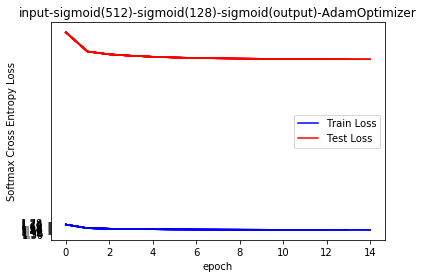

In [0]:
# Since sigmoid activation units are used here, so we will use the weights_sgd and biases defined
# above
y_sgd = multilayer_perceptron(x, weight_sgd, biases)

# Cost_function
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd, labels=y_))

# optimizer to minimize the cost
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
optimizer_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)


# Starting the Session
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.set_ylabel("Softmax Cross Entropy Loss")
    xs, y_trs, y_tes = [],[],[]
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(data.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = data.train.next_batch(batch_size)
            
            feed_dict = {x:batch_xs, y_:batch_ys}
            _,c,w = sess.run([optimizer_adam, cost_sgd, weight_sgd], feed_dict = feed_dict)
            train_avg_cost += c / total_batch
            
            c = sess.run(cost_sgd, feed_dict = {x:data.test.images, y_:data.test.labels})
            test_avg_cost += c / batch_size
            
        xs.append(epoch)
        y_trs.append(train_avg_cost)
        y_tes.append(test_avg_cost)
        dynamic_plot(xs, y_trs, y_tes, ax, np.arange(1.3, 1.8, step = 0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), 'train_cost ={:.9f}'.format(train_avg_cost),
                 'test_cost ={:.9f}'.format(test_avg_cost))
    dynamic_plot(xs, y_trs, y_tes, ax, np.arange(1.3, 1.8, step = 0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
        
        
    # Calculating the final Accuracy on test set
    correct_prediction = tf.equal(tf.argmax(y_sgd, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x:data.test.images, y_: data.test.labels}))

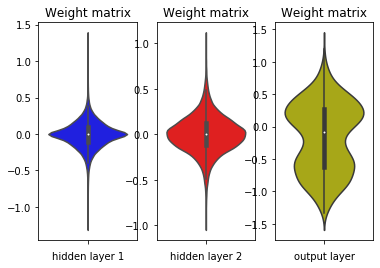

In [0]:
# Plotting weight distribution at the end of training
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = plt.figure()
plt.subplot(1,3,1)
plt.title("Weight matrix")
ax = sns.violinplot(y = h1_w, color='b')
plt.xlabel("hidden layer 1")

plt.subplot(1,3,2)
plt.title("Weight matrix")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel("hidden layer 2")

plt.subplot(1,3,3)
plt.title("Weight matrix")
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel("output layer")
plt.show()

### Model 1 + Grandient Descent optimizer

Epoch:  0001 train_cost2.332840528 test_cost2.331958501
Epoch:  0002 train_cost2.328264669 test_cost2.327268538
Epoch:  0003 train_cost2.323828512 test_cost2.322790383
Epoch:  0004 train_cost2.319615727 test_cost2.318567157
Epoch:  0005 train_cost2.315699825 test_cost2.314637713
Epoch:  0006 train_cost2.312153430 test_cost2.311104756
Epoch:  0007 train_cost2.309036160 test_cost2.308011928
Epoch:  0008 train_cost2.306384288 test_cost2.305480266
Epoch:  0009 train_cost2.304203053 test_cost2.303369904
Epoch:  0010 train_cost2.302457967 test_cost2.301680489
Epoch:  0011 train_cost2.301084129 test_cost2.300357416
Epoch:  0012 train_cost2.300003842 test_cost2.299348959
Epoch:  0013 train_cost2.299145281 test_cost2.298522429
Epoch:  0014 train_cost2.298448407 test_cost2.297869350
Epoch:  0015 train_cost2.297868412 test_cost2.297320374
Accuracy:  0.1165


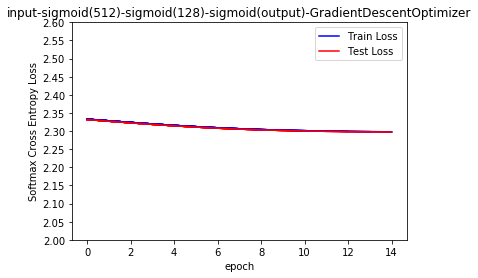

In [0]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel("epoch")
    ax.set_ylabel("Softmax Cross Entropy Loss")
    xs, y_trs, y_tes = [], [], []
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(data.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = data.train.next_batch(batch_size)
            
            feed_dict = {x:batch_xs, y_:batch_ys}
            _,c,w = sess.run([optimizer_sgdc, cost_sgd, weight_sgd], feed_dict=feed_dict)
            train_avg_cost += c / total_batch
            
            c = sess.run(cost_sgd, feed_dict={x:data.test.images, y_:data.test.labels})
            test_avg_cost += c / total_batch
            
        xs.append(epoch)
        y_trs.append(train_avg_cost)
        y_tes.append(test_avg_cost)
        dynamic_plot(xs,y_trs,y_tes,ax,np.arange(2,2.6, step = 0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")
        
        if epoch % display_step == 0:
            print("Epoch: ",'%04d' % (epoch +1), 'train_cost{:0.9f}'.format(train_avg_cost), 'test_cost{:0.9f}'.format(test_avg_cost))
    dynamic_plot(xs,y_trs,y_tes,ax,np.arange(2,2.6, step = 0.05), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")
    
    # Calucating the final accuracy
    correct_prediction = tf.equal(tf.arg_max(y_sgd, 1), tf.arg_max(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x:data.test.images, y_:data.test.labels}))

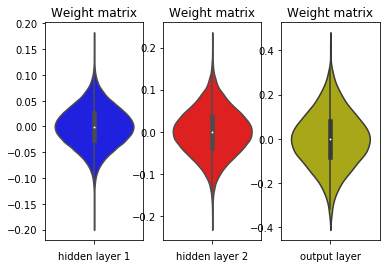

In [0]:
# Plotting the weights distribution after the end of training
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = plt.figure()
plt.subplot(1,3,1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel("hidden layer 1")

plt.subplot(1,3,2)
plt.title("Weight matrix")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel("hidden layer 2")

plt.subplot(1,3,3)
plt.title("Weight matrix")
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel("output layer")
plt.show()

### Model 2: input(784) - reul(512) - relu(128) - sigmoid(output 10)

In [0]:
def multilayer_perceptron_relu(x, weights, biases):
    print("x: ",x.get_shape(), "w[h1]: ",weights['h1'].get_shape(),
          "b[h1]: ",biases['b1'].get_shape())
    # first hidden layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    print("layer_1: ", layer_1.get_shape(), "w[h2]: ",weights['h2'].get_shape(),
         "b[h2]: ",biases['b2'].get_shape())
    
    # second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    print("layer_2: ",layer_2.get_shape(), "w[out]: ",weights['out'].get_shape(),
         "b[out]: ",biases['out'].get_shape())
    
    # output layer
    output_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    output_layer = tf.nn.sigmoid(output_layer)
    print("Output_layer: ", output_layer.get_shape())
    
    return output_layer

### Input-ReLu(512)-ReLu(128)-sigmoid(output) - AdamOptimizer

In [0]:
## For relu activation
## He initialization
## std = sqrt(2/fan_in + 1)
## +1 is for Zero division error
weights_relu = {
     'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=0.062, mean=0.0)),
     'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=0.125, mean=0.0)),
     'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=0.120, mean=0.0))
 }


biases ={
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

x:  (?, 784) w[h1]:  (784, 512) b[h1]:  (512,)
layer_1:  (?, 512) w[h2]:  (512, 128) b[h2]:  (128,)
layer_2:  (?, 128) w[out]:  (128, 10) b[out]:  (10,)
Output_layer:  (?, 10)
Epoch:  0001 train_cost=1.598827434 test_cost=1.593007700
Epoch:  0002 train_cost=1.499918327 test_cost=1.499944327
Epoch:  0003 train_cost=1.487388624 test_cost=1.491002666
Epoch:  0004 train_cost=1.481848546 test_cost=1.486924833
Epoch:  0005 train_cost=1.477957991 test_cost=1.484635267
Epoch:  0006 train_cost=1.474950650 test_cost=1.483434058
Epoch:  0007 train_cost=1.472802700 test_cost=1.481784311
Epoch:  0008 train_cost=1.471493302 test_cost=1.481454629
Epoch:  0009 train_cost=1.470242369 test_cost=1.480839597
Epoch:  0010 train_cost=1.469763840 test_cost=1.480849593
Epoch:  0011 train_cost=1.468413683 test_cost=1.479703187
Epoch:  0012 train_cost=1.467831686 test_cost=1.480290978
Epoch:  0013 train_cost=1.467275662 test_cost=1.480339480
Epoch:  0014 train_cost=1.467325956 test_cost=1.480139520
Epoch:  0015

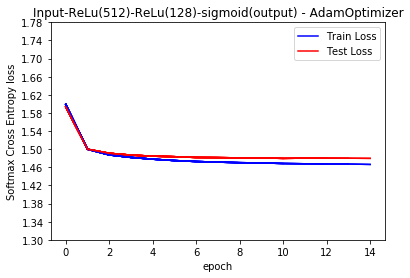

In [0]:
# for relu activation
y_relu = multilayer_perceptron_relu(x, weights_relu, biases)

# cost function
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels=y_))

# optimizers
optimizer_relu_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
optimizer_relu_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)


# Starting the session
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel("epoch")
    ax.set_ylabel("Softmax Cross Entropy loss")
    xs, y_trs, y_tes = [],[],[]
    
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(data.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = data.train.next_batch(batch_size)
            
            feed_dict = {x:batch_xs, y_:batch_ys}
            _,c,w = sess.run([optimizer_relu_adam, cost_relu, weights_relu], feed_dict=feed_dict)
            train_avg_cost += c / total_batch
            
            c = sess.run(cost_relu, feed_dict={x:data.test.images, y_:data.test.labels})
            test_avg_cost += c / total_batch
            
        xs.append(epoch)
        y_trs.append(train_avg_cost)
        y_tes.append(test_avg_cost)
        dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1.3,1.8,step=0.04),"Input-ReLu(512)-ReLu(128)-sigmoid(output) - AdamOptimizer")
        
        
        if epoch % display_step == 0:
            print("Epoch: ",'%04d' % (epoch + 1), 'train_cost={:0.9f}'.format(train_avg_cost),
                 'test_cost={:0.9f}'.format(test_avg_cost))
    # Plotting final results
    dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1.3,1.8,step=0.04),"Input-ReLu(512)-ReLu(128)-sigmoid(output) - AdamOptimizer")
    
    # Calculating the final accuracy on test data
    correct_prediction = tf.equal(tf.argmax(y_relu, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x:data.test.images, y_:data.test.labels}))

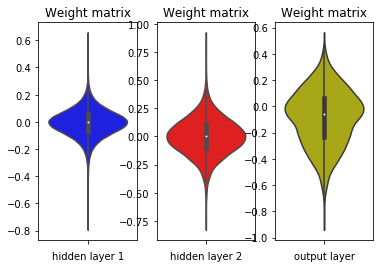

In [0]:
# Plotting the weights distribution after the end of training
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = plt.figure()
plt.subplot(1,3,1)
plt.title("Weight matrix")
sns.violinplot(y=h1_w, color = 'b')
plt.xlabel('hidden layer 1')

plt.subplot(1,3,2)
plt.title("Weight matrix")
sns.violinplot(y=h2_w, color = 'r')
plt.xlabel("hidden layer 2")

plt.subplot(1,3,3)
plt.title("Weight matrix")
sns.violinplot(y=out_w, color='y')
plt.xlabel("output layer")

plt.show()

### Model 3 + Gradient Descent Optimizer

Epoch: 0001 train_cost=2.315603524 test_cost=2.310638569
Epoch: 0002 train_cost=2.239430507 test_cost=2.233821028
Epoch: 0003 train_cost=2.176146338 test_cost=2.169474923
Epoch: 0004 train_cost=2.126166504 test_cost=2.119164408
Epoch: 0005 train_cost=2.071851561 test_cost=2.064771793
Epoch: 0006 train_cost=2.031195018 test_cost=2.023865776
Epoch: 0007 train_cost=1.996991653 test_cost=1.989675470
Epoch: 0008 train_cost=1.949802289 test_cost=1.942587328
Epoch: 0009 train_cost=1.905673622 test_cost=1.897838902
Epoch: 0010 train_cost=1.875872262 test_cost=1.867792134
Epoch: 0011 train_cost=1.854841799 test_cost=1.846855925
Epoch: 0012 train_cost=1.838778327 test_cost=1.830932389
Epoch: 0013 train_cost=1.825801311 test_cost=1.818121547
Epoch: 0014 train_cost=1.814900928 test_cost=1.807476516
Epoch: 0015 train_cost=1.805536614 test_cost=1.798254767
Accuracy:  0.7426


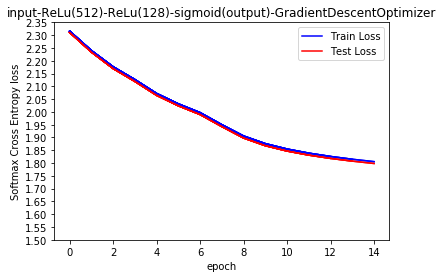

In [0]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel("epoch")
    ax.set_ylabel("Softmax Cross Entropy loss")
    
    xs,y_trs,y_tes = [],[],[]
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(data.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = data.train.next_batch(batch_size)
            feed_dict = {x:batch_xs, y_: batch_ys}
            _,c,w = sess.run([optimizer_relu_sgdc, cost_relu, weights_relu], feed_dict=feed_dict)
            train_avg_cost += c / total_batch
            
            c = sess.run(cost_relu, feed_dict={x:data.test.images, y_:data.test.labels})
            test_avg_cost += c / total_batch
            
            
        xs.append(epoch)
        y_trs.append(train_avg_cost)
        y_tes.append(test_avg_cost)
        dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1.5,2.4,step=0.05),"input-ReLu(512)-ReLu(128)-sigmoid(output)-GradientDescentOptimizer")
        
        if epoch % display_step == 0:
            print("Epoch:",'%04d' % (epoch +1), "train_cost={:0.9f}".format(train_avg_cost),
                 "test_cost={:0.9f}".format(test_avg_cost))
            
    # Plotting the final results
    dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1.5,2.4,step=0.05),"input-ReLu(512)-ReLu(128)-sigmoid(output)-GradientDescentOptimizer")
    
    # calculating the final accuracy on test set
    correct_prediction = tf.equal(tf.argmax(y_relu, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ", accuracy.eval({x:data.test.images, y_:data.test.labels}))    

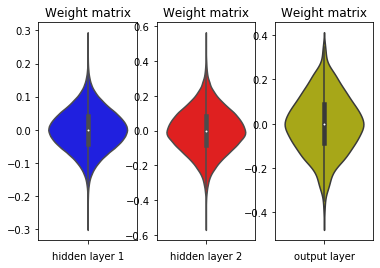

In [0]:
# Plotting weights distribution after the end of training

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = plt.figure()
plt.subplot(1,3,1)
plt.title("Weight matrix")
sns.violinplot(y=h1_w, color = 'b')
plt.xlabel("hidden layer 1")

plt.subplot(1,3,2)
plt.title("Weight matrix")
sns.violinplot(y=h2_w, color = 'r')
plt.xlabel("hidden layer 2")

plt.subplot(1,3,3)
plt.title("Weight matrix")
sns.violinplot(y=out_w, color = 'y')
plt.xlabel("output layer")
plt.show()

## Batch Normalization

In [0]:
# Input - Sigmoid(BatchNormalization(512)) - Sigmoid(BatchNormalization(128))- Sigmoid(output)

epsilon = 1e-3  # to ignore the zero division error
def multilayer_perceptron_batch(x,weights,biases):
  print("x:",x.get_shape(), "w[h1]:",weights['h1'].get_shape(),"b[h1]:",biases['b1'].get_shape())
  
  ###################################################################################################
  # hidden layer 1 with sigmoid activation and batch normalization
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  
  # calculating the mean and variance of x
  batch_mean_1, batch_var_1 = tf.nn.moments(x=layer_1, axes = [0])
  
  scale_1 = tf.Variable(tf.ones([n_hidden_1]))
  beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
  
  layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  layer_1 = tf.nn.sigmoid(layer_1)
  
  print("layer_1:",layer_1.get_shape(), "w[h2]:",weights['h2'].get_shape(),
        "b[h2]:",biases['b2'].get_shape())
  
  ###################################################################################################
  # hidden layer 2 with sigmoid activation and batch normalization
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  
  # calculating mean and variance
  batch_mean_2, batch_var_2 = tf.nn.moments(x=layer_2, axes=[0])
  
  scale_2 = tf.Variable(tf.ones([n_hidden_2]))
  beta_2  = tf.Variable(tf.zeros([n_hidden_2]))
  
  layer_2 = tf.nn.batch_normalization(layer_2,batch_mean_2,batch_var_2,beta_2,scale_2,epsilon)
  layer_2 = tf.nn.sigmoid(layer_2)
  
  print("layer_2:",layer_2.get_shape(),'w[out]:',weights['out'].get_shape(),'b[out]:',biases['out'].get_shape())
  
  ############################################################################################################
  # output layer with sigmoid activation
  output_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
  output_layer = tf.nn.sigmoid(output_layer)
  
  print("output_layer:",output_layer.get_shape())
  
  return output_layer
    
  

### Model + adam optimizer

x: (?, 784) w[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) w[h2]: (512, 128) b[h2]: (128,)
layer_2: (?, 128) w[out]: (128, 10) b[out]: (10,)
output_layer: (?, 10)
Epoch: 0001 train_cost=1.697583285 test_cost=1.688785567
Epoch: 0002 train_cost=1.554076137 test_cost=1.549964390
Epoch: 0003 train_cost=1.515557381 test_cost=1.514422859
Epoch: 0004 train_cost=1.499637685 test_cost=1.500884181
Epoch: 0005 train_cost=1.491456502 test_cost=1.494698820
Epoch: 0006 train_cost=1.485779944 test_cost=1.490971533
Epoch: 0007 train_cost=1.482150480 test_cost=1.488436039
Epoch: 0008 train_cost=1.479508218 test_cost=1.486477330
Epoch: 0009 train_cost=1.477308640 test_cost=1.484938589
Epoch: 0010 train_cost=1.475157620 test_cost=1.483791500
Epoch: 0011 train_cost=1.473966615 test_cost=1.482970335
Epoch: 0012 train_cost=1.472769264 test_cost=1.482439119
Epoch: 0013 train_cost=1.471822127 test_cost=1.481964897
Epoch: 0014 train_cost=1.470745047 test_cost=1.481866480
Epoch: 0015 train_cost=1.469778329 t

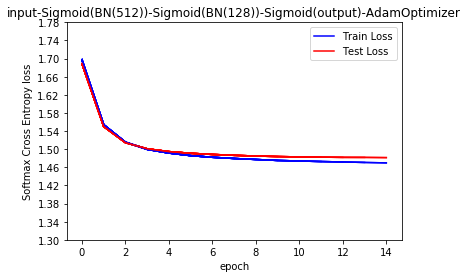

In [0]:
y_batch =  multilayer_perceptron_batch(x,weight_sgd,biases)

# cost function
cost_batch = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_batch, labels=y_))

# optimizer
optimizer_batch_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_batch)
optimizer_batch_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_batch)



# Session
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel("epoch")
  ax.set_ylabel("Softmax Cross Entropy loss")
  
  xs,y_trs,y_tes = [],[],[]
  for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost = 0.
    total_batch = int(data.train.num_examples / batch_size)
    
    for i in range(total_batch):
      batch_xs, batch_ys = data.train.next_batch(batch_size)
      
      feed_dict = {x:batch_xs, y_:batch_ys}
      _,c,w = sess.run([optimizer_batch_adam,cost_batch,weight_sgd], feed_dict=feed_dict)
      train_avg_cost += c / total_batch
      
      feed_dict = {x:data.test.images, y_:data.test.labels}
      c = sess.run(cost_batch, feed_dict=feed_dict)
      test_avg_cost += c / total_batch
      
    xs.append(epoch)
    y_trs.append(train_avg_cost)
    y_tes.append(test_avg_cost)
    dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1.3, 1.8, step=0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-AdamOptimizer")
    
    if epoch % display_step == 0:
      print("Epoch:",'%04d' % (epoch + 1), "train_cost={:0.9f}".format(train_avg_cost),
           "test_cost={:0.9f}".format(test_avg_cost))
  
  # Plotting the final results
  dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1.3, 1.8, step=0.04), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-AdamOptimizer")
  
  # Calculating the accurancy on test set
  correct_prediction = tf.equal(tf.argmax(y_batch, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x:data.test.images, y_:data.test.labels}))

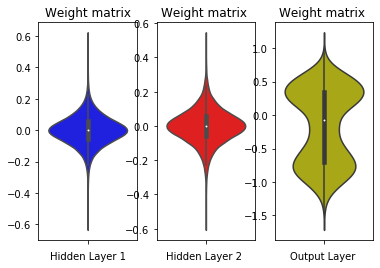

In [0]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Model 3 + GradientDescentOptimizer

Epoch: 0001 train cost=2.314716583 test cost=2.313325156
Epoch: 0002 train cost=2.278426728 test cost=2.275927522
Epoch: 0003 train cost=2.241627516 test cost=2.238166984
Epoch: 0004 train cost=2.207196624 test cost=2.203040159
Epoch: 0005 train cost=2.176640836 test cost=2.171933512
Epoch: 0006 train cost=2.150074942 test cost=2.145134516
Epoch: 0007 train cost=2.127192143 test cost=2.121882005
Epoch: 0008 train cost=2.106894453 test cost=2.101366175
Epoch: 0009 train cost=2.088322094 test cost=2.082718094
Epoch: 0010 train cost=2.071259084 test cost=2.065356062
Epoch: 0011 train cost=2.054970868 test cost=2.048949287
Epoch: 0012 train cost=2.039806142 test cost=2.033560765
Epoch: 0013 train cost=2.025528595 test cost=2.019092248
Epoch: 0014 train cost=2.012351913 test cost=2.005745198
Epoch: 0015 train cost=2.000301936 test cost=1.993507386
Accuracy: 0.7976


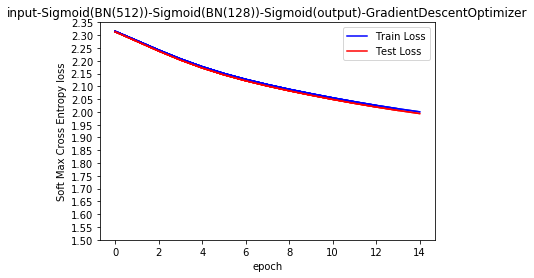

In [0]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(data.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = data.train.next_batch(batch_size)

            # here we use GradientDescentOptimizer
            _, c, w = sess.run([optimizer_batch_sgdc, cost_batch, weight_sgd], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch, feed_dict={x: data.test.images, y_: data.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        dynamic_plot(xs, ytrs, ytes, ax,np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-GradientDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    dynamic_plot(xs, ytrs, ytes, ax, np.arange(1.5, 2.4, step=0.05), "input-Sigmoid(BN(512))-Sigmoid(BN(128))-Sigmoid(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_batch,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))

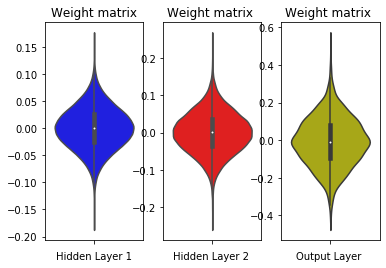

In [0]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Model 4: Input - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)

In [0]:
# Createing the model
def multilayer_perceptron_dropout(x, weights, biases):
  print("x:",x.get_shape(), "w[h1]: ",weights['h1'].get_shape(), "b['h1']: ",biases['b1'].get_shape())
  
  # first hidden layer with relu activation
  layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  
  # Adding the dropout layer
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
  
  print("layer_1_drop: ",layer_1_drop.get_shape(), "w[h2]: ",weights['h2'].get_shape(),
        "b[h2]: ",biases['b2'].get_shape())
  
  # Second dropout layer with relu activation
  layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  
  # dropout layer
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
  
  print("layer_2_drop: ",layer_2_drop.get_shape(), "w[out]: ",weights['out'].get_shape(),
        "b[out]: ",biases['out'].get_shape())
  
  # Output layer
  output_layer = tf.add(tf.matmul(layer_2_drop, weights['out']), biases['out'])
  output_layer = tf.nn.sigmoid(output_layer)
  print("output_layer: ", output_layer.get_shape())
  
  return output_layer 

### Model + Adamoptimizer

x: (?, 784) w[h1]:  (784, 512) b['h1']:  (512,)
layer_1_drop:  (?, 512) w[h2]:  (512, 128) b[h2]:  (128,)
layer_2_drop:  (?, 128) w[out]:  (128, 10) b[out]:  <bound method Variable.get_shape of <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>>
output_layer:  (?, 10)
Epoch:  0001 train_cost = 1.684787736 test_cost = 1.605614020
Epoch:  0002 train_cost = 1.549171569 test_cost = 1.516247189
Epoch:  0003 train_cost = 1.526262769 test_cost = 1.503114804
Epoch:  0004 train_cost = 1.515788401 test_cost = 1.496344988
Epoch:  0005 train_cost = 1.508509340 test_cost = 1.492488296
Epoch:  0006 train_cost = 1.503201677 test_cost = 1.489789620
Epoch:  0007 train_cost = 1.499119257 test_cost = 1.487626082
Epoch:  0008 train_cost = 1.495743499 test_cost = 1.485759757
Epoch:  0009 train_cost = 1.494404338 test_cost = 1.484563184
Epoch:  0010 train_cost = 1.491782414 test_cost = 1.483877556
Epoch:  0011 train_cost = 1.490054098 test_cost = 1.483189078
Epoch:  0012 train_cost = 1.489105205 te

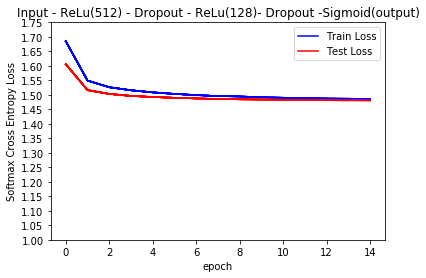

In [20]:
y_drop = multilayer_perceptron_dropout(x, weights_relu, biases)

# cost function
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_drop, labels=y_))

# Optimizers
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)
optimizer_drop_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_drop)


# Session
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel("epoch")
  ax.set_ylabel("Softmax Cross Entropy Loss")
  
  xs,y_trs,y_tes = [],[],[]
  for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost = 0.
    total_batch = int(data.train.num_examples / batch_size)
    
    for i in range(total_batch):
      batch_xs, batch_ys = data.train.next_batch(batch_size)
      
      feed_dict = {x:batch_xs, y_:batch_ys, keep_prob:0.5}
      _,c,w = sess.run([optimizer_drop_adam,cost_drop,weights_relu], feed_dict = feed_dict)
      train_avg_cost += c / total_batch
      
      c = sess.run(cost_drop, feed_dict={x:data.test.images, y_:data.test.labels, keep_prob:1.0})
      test_avg_cost += c / total_batch
      
    xs.append(epoch)
    y_trs.append(train_avg_cost)
    y_tes.append(test_avg_cost)
    dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1,1.8,step=0.05),"Input - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)")
    
    
    if epoch % display_step == 0:
      print("Epoch: ","%04d" % (epoch+1), "train_cost = {:0.9f}".format(train_avg_cost),
            "test_cost = {:0.9f}".format(test_avg_cost))
  
  # Plotting the final plot
  dynamic_plot(xs,y_trs,y_tes,ax,np.arange(1,1.8,step=0.05),"Input - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)")
  
  # Calculating the accuracy on test set
  correct_prediction = tf.equal(tf.argmax(y_drop, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  
  print("Accuracy: ", accuracy.eval({x:data.test.images, y_: data.test.labels, keep_prob:1.0}))

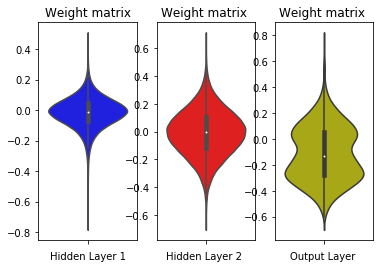

In [22]:
# Plotting the weight distribution after the end of trainng
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()